<a href="https://colab.research.google.com/github/charmy2525/DataAnalytics/blob/main/1_Data_Cleaning_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Data Cleaning

## Load Data

In [ ]:
import pandas as pd #ใช้ library ชื่อ pandas ในการอ่านข้อมูลจากไฟล์

#อ่านไฟล์ข้อมูลที่เก็บไว้ใน file hosting ในที่นี้คือ github
datafile = 'https://raw.githubusercontent.com/charmy2525/DataAnalytics/main/Data%20analytics%20course%20data%20set%20-%20student%20academic%20performance%20-%20missing%20data.csv'
data = pd.read_csv(datafile)

data #ทำการแสดงข้อมูล ใช้ได้เฉพาะเป็น บรรทัดสุดท้ายของ cell หากไม่ใช่บรรทัดสุดท้าย ต้องใช้ print(data)

,Student_ID,Year_of_Entry,TCAS_channels,Gender,Age,Years_Living_in_BKK,Hometown_REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,...,Chemistry_1,Statistics,Computer_Programming,Thermodynamics,Engineering_Materials,Engineering_Drawing,University_GPAx_1st_year,Scholarship_Excellent_Performance,Scholarship_Financial_Aid,Participation_on_Activities
0,1,2020.0,3.0,Female,18.0,0.0,S,Urban,Apartment,36,...,1.5,2.0,1.5,0.0,1.0,2.0,1.78,No,No,Medium
1,2,2020.0,3.0,Male,18.0,18.0,BKK,Urban,Home,5,...,3.5,3.5,2.5,4.0,3.0,1.0,2.86,No,No,High
2,3,2020.0,3.0,Male,18.0,NaN,BKK,Urban,Apartment,76,...,2.5,3.0,4.0,3.0,2.5,2.0,3.20,No,No,No
3,4,2020.0,1.0,Male,18.0,3.0,BKK,Urban,Home,77,...,1.5,2.5,2.0,2.0,1.5,2.0,2.20,No,No,Low
4,5,2020.0,2.0,Female,18.0,18.0,BKK,Urban,Home,1001,...,1.0,2.5,1.5,1.5,2.5,3.0,2.19,No,No,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,1196,2018.0,3.0,Female,18.0,0.0,S,Urban,Apartment,17,...,4.0,3.5,3.0,2.0,4.0,2.5,3.23,No,No,Medium
1218,1197,2018.0,2.0,Female,18.0,18.0,BKK,Urban,Home,23,...,1.0,2.0,2.0,3.0,2.0,2.0,2.01,No,No,Medium
1219,1198,NaN,2.0,Female,18.0,0.0,S,Rural,Apartment,26,...,1.0,3.0,2.0,1.0,3.0,1.5,2.06,No,No,Medium
1220,1199,2018.0,2.0,Female,19.0,19.0,BKK,Urban,Apartment,50,...,2.0,2.5,1.5,1.5,1.0,2.5,1.93,No,No,Low


Check data infomation

In [ ]:
data.info() #แสดงลักษณะของข้อมูล จำนวน ชนิดของข้อมูล ชื่อ feature (column)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222 entries, 0 to 1221
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Student_ID                         1222 non-null   int64  
 1   Year_of_Entry                      1114 non-null   float64
 2   TCAS_channels                      1153 non-null   float64
 3   Gender                             1160 non-null   object 
 4   Age                                1159 non-null   float64
 5   Years_Living_in_BKK                1176 non-null   float64
 6   Hometown_REGION                    1175 non-null   object 
 7   Address_Type                       1162 non-null   object 
 8   Where_to_stay                      1168 non-null   object 
 9   Time_spent_for_traveling           1222 non-null   int64  
 10  InternetAccess_at_Home             1222 non-null   object 
 11  Living_expenses                    1222 non-null   int64

## Missing data

Check missing data (option1)

In [ ]:
df=data.copy() #copy data เก็บไว้ในตัวแปรชื่อ df 
               #เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 
               #เวลาเปลี่ยนค่าตัวแปรหนึ่ง อีกตัวจะเปลี่ยนตามทันที เสี่ยงต่อการที่ ข้อมูลหลักจะเปลี่ยนแปลงไป
               #โดยไม่ได้ตั้งใจ

df.isnull().sum()# ดูว่ามี ช่องว่าง column ละกี่จุด โดยคำสั่งนี้จะดูว่า ข้อมูลแต่ละ column มีแถวไหนเป็นช่องว่างบ้าง แล้วนับรวมให้ในแต่ละ column

Student_ID                             0
Year_of_Entry                        108
TCAS_channels                         69
Gender                                62
Age                                   63
Years_Living_in_BKK                   46
Hometown_REGION                       47
Address_Type                          60
Where_to_stay                         54
Time_spent_for_traveling               0
InternetAccess_at_Home                 0
Living_expenses                        0
Type_of_prior_school                  25
Prior_School_Province_REGION           0
School_name                            0
Math                                   0
Physics                                0
Chemistry                              0
Biology                                0
Family_Size                            0
Stay_with                              0
Family_status                          0
Father_Education                       0
Mother_Education                       0
guardian        

Check missing data (option2)

In [ ]:
df=data.copy() #copy data เก็บไว้ในตัวแปรชื่อ df เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

feature name        missing data
Year_of_Entry              108
TCAS_channels               69
Gender                      62
Age                         63
Years_Living_in_BKK         46
Hometown_REGION             47
Address_Type                60
Where_to_stay               54
Type_of_prior_school        25


remove row

In [ ]:
#remove for unpredictable feature and significant feature
'''
feature                     
===========================================
Year_of_Entry                        predictable from other rows
TCAS_channels                       *unpredictable and will be removed
Gender                               no significant
Age                                  no significant
Years_Living_in_BKK                  predictable from 'Hometown_REGION' is not BKK will be 0
Hometown_REGION                      predictable from 'Prior_School_Province_REGION' in BKK will be BKK
                                    *unpredictable if 'Prior_School_Province_REGION' is outside BKK and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
                                     even may not 100% accurate
Address_Type                         predictable from 'Hometown_REGION' in BKK will be Urban
                                    *unpredictable if 'Hometown_REGION' is outside and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
Where_to_stay                        predictable from 'Hometown_REGION' in BKK may stay at Home outside BKK may stay at Apartment
                                     even may not 100% accurate
Type_of_prior_school                *unpredictable and will be removed
'''

df2=df.copy()  #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 

#แสดงข้อมูลของ feature ชื่อว่า TCAS_channels_ และ Type_of_prior_school ที่ข้อมูลหายไปแต่ละแถว ก่อน remove แถวออกไป
print('\n before remove missing data')
print(f"{'row':<6}{'TCAS_channels':>5}") 

  #คำสั่ง .loc ใช้กับ ตัวแปร dataframe ในที่นี้คือ df2 แสดงตำแหน่งคือแถวของข้อมูล เราระบุว่าเป็นข้อมูล TCAS_channels_ โดยในวงเล็บ () ของ loc ใส่เงื่อนไขว่าเลือกมาเฉพาะที่ข้อมูลมันเป็นช่องว่าง
print(df2['TCAS_channels'].loc[df2['TCAS_channels'].isnull()],'\nTCAS_channels missing data : ',df2['TCAS_channels'].isnull().sum())
print('\n',df2['Type_of_prior_school'].loc[df2['Type_of_prior_school'].isnull()],'\nType_of_prior_school missing data : ',df2['Type_of_prior_school'].isnull().sum())

#remove missing data row with dropna
df2 = df2.dropna(subset=['TCAS_channels']) #.dropna คือให้ลบแถวที่มีช่องว่างออก โดยใส่เงื่อนไข ในที่นี้คือ subset = ['TCAS_channels_'] คือทุกแถวที่ TCAS_channels_ เป็นช่องว่าง คือ ข้อมูลหายไป
df2 = df2.dropna(subset=['Type_of_prior_school']) #.dropna คือให้ลบแถวที่มีช่องว่างออก โดยใส่เงื่อนไข ในที่นี้คือ subset = ['Type_of_prior_school'] คือทุกแถวที่ Type_of_prior_school เป็นช่องว่าง คือ ข้อมูลหายไป

#ตรวจสอบยังมีแถวที่ข้อมูลที่หายไปหรือไม่ โดยทำการแสดงข้อมูลของ feature ชื่อว่า TCAS_channels_ และ Type_of_prior_school ที่ข้อมูลหายไปแต่ละแถว
#ผลลัพธ์ควรแสดงว่าไม่เหลือแถวที่ข้อมูลหายไปแล้ว
print('\n after remove missing data')
print(f"{'row':<6}{'TCAS_channels':>5}") 

  #คำสั่ง .loc ใช้กับ ตัวแปร dataframe ในที่นี้คือ df2 แสดงตำแหน่งคือแถวของข้อมูล เราระบุว่าเป็นข้อมูล TCAS_channels_ โดยในวงเล็บ () ของ loc ใส่เงื่อนไขว่าเลือกมาเฉพาะที่ข้อมูลมันเป็นช่องว่าง
print(df2['TCAS_channels'].loc[df2['TCAS_channels'].isnull()],'\nTCAS_channels missing data : ',df2['TCAS_channels'].isnull().sum())
print('\n',df2['Type_of_prior_school'].loc[df2['Type_of_prior_school'].isnull()],'\nType_of_prior_school missing data : ',df2['Type_of_prior_school'].isnull().sum())



 before remove missing data
row   TCAS_channels
5      NaN
56     NaN
57     NaN
77     NaN
81     NaN
        ..
1148   NaN
1154   NaN
1158   NaN
1182   NaN
1199   NaN
Name: TCAS_channels, Length: 69, dtype: float64 
TCAS_channels missing data :  69

 7       NaN
100     NaN
238     NaN
319     NaN
397     NaN
490     NaN
578     NaN
618     NaN
621     NaN
645     NaN
665     NaN
689     NaN
703     NaN
705     NaN
707     NaN
733     NaN
753     NaN
817     NaN
880     NaN
885     NaN
999     NaN
1003    NaN
1044    NaN
1054    NaN
1159    NaN
Name: Type_of_prior_school, dtype: object 
Type_of_prior_school missing data :  25

 after remove missing data
row   TCAS_channels
Series([], Name: TCAS_channels, dtype: float64) 
TCAS_channels missing data :  0

 Series([], Name: Type_of_prior_school, dtype: object) 
Type_of_prior_school missing data :  0


Update Main dataframe and check data information

In [ ]:
#.shape เป็นคำสั่งใช้ดูว่าข้อมูลมีจำนวนทั้งหมดเท่าไร โดยหาว่าข้อมูกหายไปเท่าไรคือ ดูจาก ข้อมูลก่อนถูก remove หักลบด้วยข้อมูลหลังถูก remove เพราะว่าเรา remove คือลบ ข้อมูลต้องหายไปบางส่วน
#ในส่วนของ feature ที่เราลบหากข้อมูลหายไปก็เข้าใจได้ แต่เราอยากดูว่า แถวที่ลบไปนั้น ไปลบข้อมูล feature อื่นไปด้วยไหม ลบไปเยอะเท่าไร
#ทำให้สูตรการคำนวณมีการพลิกแพลงบ้าง ดังจะสังเกตุได้จาก code

print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n') 

df=df2.copy() #copy กลับเมื่อแน่ใจแล้วว่าทำการ clean เรียบร้อย โดย copy df2 มาที่ df
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Student_ID                           94
Year_of_Entry                        85
TCAS_channels                        25
Gender                               89
Age                                  90
Years_Living_in_BKK                  93
Hometown_REGION                      93
Address_Type                         90
Where_to_stay                        90
Time_spent_for_traveling             94
InternetAccess_at_Home               94
Living_expenses                      94
Type_of_prior_school                 69
Prior_School_Province_REGION         94
School_name                          94
Math                                 94
Physics                              94
Chemistry                            94
Biology                              94
Family_Size                          94
Stay_with                            94
Family_status                        94
Father_Education                     94
Mother_Education                     94
guardian                

**Fill the missing data**

> For this example, we will fill the **Year_of_Entry** data based on **Student_ID**

> https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html#pandas.DataFrame.fillna

> method{*‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, None*}

Method to use for filling holes in reindexed Series 
> *pad* / *ffill* : propagate last valid observation forward to next valid  
> *backfill* / *bfill* : use next valid observation to fill gap



In [ ]:
'''
feature                     
===========================================
Year_of_Entry                        predictable from other rows
TCAS_channels                  Done *unpredictable and will be removed
Gender                               no significant
Age                                  no significant
Years_Living_in_BKK                  predictable from 'Hometown_REGION' is not BKK will be 0
Hometown_REGION                      predictable from 'Prior_School_Province_REGION' in BKK will be BKK
                                    *unpredictable if 'Prior_School_Province_REGION' is outside BKK and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
                                     even may not 100% accurate
Address_Type                         predictable from 'Hometown_REGION' in BKK will be Urban
                                    *unpredictable if 'Hometown_REGION' is outside and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
Where_to_stay                        predictable from 'Hometown_REGION' in BKK may stay at Home outside BKK may stay at Apartment
                                     even may not 100% accurate
Type_of_prior_school           Done *unpredictable and will be removed
'''

#deal with Year_of_entry
df2=df.copy() #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 

print('\n before fill missing data')
print(df2['Year_of_Entry'].loc[df2['Year_of_Entry'].isnull()],'\nYear_of_Entry missing data : ',df2['Year_of_Entry'].isnull().sum())

#fill missing data with fillna
df3=df2['Year_of_Entry'].copy() #สนใจเฉพาะ Year_of_entry เลย copy แยกมาทำการเติมต่อไป
df3=df3.fillna(method='ffill') #.fillna คือให้เติมแถวที่มีช่องว่าง โดยในที่นี้กำหนดวิธีแบบ 'ffill' คือใช้ค่าจากบรรทัดก่อนหน้าช่องว่าง มาเติมใส่

df2['Year_of_Entry']=df3.copy() #copy เพื่อคืนค่าจาก df3 กลับไปที่ df2

print('\n\n after fill missing data')
print(df2['Year_of_Entry'].loc[df2['Year_of_Entry'].isnull()],'\nYear_of_Entry missing data : ',df2['Year_of_Entry'].isnull().sum())

print('Before Year_of_Entry missing data =', df['Year_of_Entry'].isnull().sum())
print('After Year_of_Entry missing data =', df2['Year_of_Entry'].isnull().sum()) #Check data


 before fill missing data
15     NaN
16     NaN
23     NaN
35     NaN
49     NaN
        ..
1171   NaN
1195   NaN
1200   NaN
1214   NaN
1219   NaN
Name: Year_of_Entry, Length: 99, dtype: float64 
Year_of_Entry missing data :  99


 after fill missing data
Series([], Name: Year_of_Entry, dtype: float64) 
Year_of_Entry missing data :  0
Before Year_of_Entry missing data = 99
After Year_of_Entry missing data = 0


Update Main dataframe and check data information

In [ ]:
print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n')
df=df2.copy()
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Student_ID                            0
Year_of_Entry                       -99
TCAS_channels                         0
Gender                                0
Age                                   0
Years_Living_in_BKK                   0
Hometown_REGION                       0
Address_Type                          0
Where_to_stay                         0
Time_spent_for_traveling              0
InternetAccess_at_Home                0
Living_expenses                       0
Type_of_prior_school                  0
Prior_School_Province_REGION          0
School_name                           0
Math                                  0
Physics                               0
Chemistry                             0
Biology                               0
Family_Size                           0
Stay_with                             0
Family_status                         0
Father_Education                      0
Mother_Education                      0
guardian                

Fill **Hometown REGION** based on **Prior_School_Province REGION**

> Assume that **Hometown REGION** = BKK if student's **Prior_School_Province REGION** is BKK


In [ ]:
'''
feature                     
===========================================
Year_of_Entry                  Done  predictable from other rows
TCAS_channels                  Done *unpredictable and will be removed
Gender                               no significant
Age                                  no significant
Years_Living_in_BKK                  predictable from 'Hometown_REGION' is not BKK will be 0
Hometown_REGION                      predictable from 'Prior_School_Province_REGION' in BKK will be BKK
                                    *unpredictable if 'Prior_School_Province_REGION' is outside BKK and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
                                     even may not 100% accurate
Address_Type                         predictable from 'Hometown_REGION' in BKK will be Urban
                                    *unpredictable if 'Hometown_REGION' is outside and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
Where_to_stay                        predictable from 'Hometown_REGION' in BKK may stay at Home outside BKK may stay at Apartment
                                     even may not 100% accurate
Type_of_prior_school           Done *unpredictable and will be removed
'''

#deal with Hometown REGION
#print(df2['Hometown REGION'].isnull().sum())
df2=df.copy() #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 

print(df2['Hometown_REGION'].loc[df2['Hometown_REGION'].isnull()],'\nHometown_REGION missing data : ',df2['Hometown_REGION'].isnull().sum())

df3=df2['Hometown_REGION'].copy()

#assign value by condition
for ind in df2.index:
  if df2['Hometown_REGION'].isnull()[ind]  and df2['Prior_School_Province_REGION'][ind]=='BKK' : #ตรวจสอบเงื่อนไข ตามที่คิดไว้ว่าจะเติมอย่างไร
    df3[ind]=df2['Prior_School_Province_REGION'][ind] #ทำการเต็มคือกำหนดค่าช่องว่าง ให้สอดคล้องกับแนวคิด ในที่นี้คือ predictable from 'Prior_School_Province REGION' in BKK will be BKK


df2['Hometown_REGION']=df3.copy()

print(df2['Hometown_REGION'].loc[df2['Hometown_REGION'].isnull()],'\nHometown_REGION missing data : ',df2['Hometown_REGION'].isnull().sum())

print('Before Hometown_REGION missing data =', df['Hometown_REGION'].isnull().sum())
print('After Hometown_REGION missing data =', df2['Hometown_REGION'].isnull().sum()) #Check data


55      NaN
95      NaN
107     NaN
110     NaN
116     NaN
118     NaN
130     NaN
153     NaN
154     NaN
166     NaN
182     NaN
210     NaN
218     NaN
247     NaN
264     NaN
306     NaN
311     NaN
326     NaN
386     NaN
389     NaN
396     NaN
473     NaN
488     NaN
492     NaN
504     NaN
520     NaN
545     NaN
576     NaN
591     NaN
598     NaN
614     NaN
632     NaN
685     NaN
744     NaN
813     NaN
859     NaN
870     NaN
943     NaN
970     NaN
1001    NaN
1056    NaN
1102    NaN
1113    NaN
1121    NaN
1128    NaN
1193    NaN
Name: Hometown_REGION, dtype: object 
Hometown_REGION missing data :  46
118     NaN
182     NaN
311     NaN
396     NaN
492     NaN
632     NaN
744     NaN
870     NaN
970     NaN
1056    NaN
1102    NaN
1113    NaN
Name: Hometown_REGION, dtype: object 
Hometown_REGION missing data :  12
Before Hometown_REGION missing data = 46
After Hometown_REGION missing data = 12


Update Main dataframe and check data information

In [ ]:
print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n')
df=df2.copy()
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Student_ID                            0
Year_of_Entry                         0
TCAS_channels                         0
Gender                                0
Age                                   0
Years_Living_in_BKK                   0
Hometown_REGION                     -34
Address_Type                          0
Where_to_stay                         0
Time_spent_for_traveling              0
InternetAccess_at_Home                0
Living_expenses                       0
Type_of_prior_school                  0
Prior_School_Province_REGION          0
School_name                           0
Math                                  0
Physics                               0
Chemistry                             0
Biology                               0
Family_Size                           0
Stay_with                             0
Family_status                         0
Father_Education                      0
Mother_Education                      0
guardian                

remove missing data of 'Hometown REGION'

In [ ]:
df=df2.copy()

df2=df.copy() #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 
print(df2['Hometown_REGION'].loc[df2['Hometown_REGION'].isnull()],'\nHometown_REGION missing data : ',df2['Hometown_REGION'].isnull().sum())

#remove missing data row with dropna
df2 = df2.dropna(subset=['Hometown_REGION']) #ส่วนที่นอกเหนือจาก แนวคิดของเราในการเติมค่า จะยังเหลือเป็นช่อง ก็ทำการ ลบข้อมูลออกไป

print(df2['Hometown_REGION'].loc[df2['Hometown_REGION'].isnull()],'\nHometown_REGION missing data : ',df2['Hometown_REGION'].isnull().sum())


118     NaN
182     NaN
311     NaN
396     NaN
492     NaN
632     NaN
744     NaN
870     NaN
970     NaN
1056    NaN
1102    NaN
1113    NaN
Name: Hometown_REGION, dtype: object 
Hometown_REGION missing data :  12
Series([], Name: Hometown_REGION, dtype: object) 
Hometown_REGION missing data :  0


Update Main dataframe and check data information

In [ ]:
print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n')
df=df2.copy()
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Student_ID                           12
Year_of_Entry                        12
TCAS_channels                        12
Gender                               12
Age                                  10
Years_Living_in_BKK                  12
Hometown_REGION                       0
Address_Type                         12
Where_to_stay                        12
Time_spent_for_traveling             12
InternetAccess_at_Home               12
Living_expenses                      12
Type_of_prior_school                 12
Prior_School_Province_REGION         12
School_name                          12
Math                                 12
Physics                              12
Chemistry                            12
Biology                              12
Family_Size                          12
Stay_with                            12
Family_status                        12
Father_Education                     12
Mother_Education                     12
guardian                

Fill **Years_Living_in_BKK** based on **Hometown REGION**

> Assume that **Years_Living_in_BKK** = 0 if student's **Hometown REGION** is not BKK

In [ ]:
'''
feature                     
===========================================
Year_of_Entry                  Done  predictable from other rows
TCAS_channels                  Done *unpredictable and will be removed
Gender                               no significant
Age                                  no significant
Years_Living_in_BKK                  predictable from 'Hometown_REGION' is not BKK will be 0 and other will be removed
Hometown_REGION                Done  predictable from 'Prior_School_Province_REGION' in BKK will be BKK
                                    *unpredictable if 'Prior_School_Province_REGION' is outside BKK and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
                                     even may not 100% accurate
Address_Type                         predictable from 'Hometown_REGION' in BKK will be Urban
                                    *unpredictable if 'Hometown_REGION' is outside and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
Where_to_stay                        predictable from 'Hometown_REGION' in BKK may stay at Home outside BKK may stay at Apartment
                                     even may not 100% accurate
Type_of_prior_school           Done *unpredictable and will be removed
'''

df2=df.copy() #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 
print(df2['Years_Living_in_BKK'].loc[df2['Years_Living_in_BKK'].isnull()],'\nYears_Living_in_BKK missing data : ',df2['Years_Living_in_BKK'].isnull().sum())

df3=df2['Years_Living_in_BKK'].copy()

#assign value by condition
for ind in df2.index:
  if df2['Years_Living_in_BKK'].isnull()[ind]  and df2['Hometown_REGION'][ind]!='BKK' : #คล้ายอันก่อนหน้า คือเติมตามแนวคิด ก็ตรวจสอบเงื่อนไข และกำหนดค่าตามแนวคิดในการเติม
    df3[ind]=0

df2['Years_Living_in_BKK'] = df3.copy()
print(df2['Years_Living_in_BKK'].loc[df2['Years_Living_in_BKK'].isnull()],'\nYears_Living_in_BKK missing data : ',df2['Years_Living_in_BKK'].isnull().sum())

2      NaN
24     NaN
71     NaN
88     NaN
95     NaN
146    NaN
194    NaN
197    NaN
235    NaN
242    NaN
295    NaN
325    NaN
386    NaN
449    NaN
495    NaN
501    NaN
542    NaN
564    NaN
567    NaN
587    NaN
624    NaN
630    NaN
638    NaN
675    NaN
676    NaN
736    NaN
738    NaN
769    NaN
772    NaN
780    NaN
785    NaN
816    NaN
829    NaN
830    NaN
867    NaN
887    NaN
922    NaN
985    NaN
1005   NaN
1025   NaN
1026   NaN
1057   NaN
1063   NaN
1149   NaN
1173   NaN
Name: Years_Living_in_BKK, dtype: float64 
Years_Living_in_BKK missing data :  45
2      NaN
24     NaN
71     NaN
88     NaN
95     NaN
146    NaN
194    NaN
235    NaN
386    NaN
449    NaN
495    NaN
542    NaN
564    NaN
624    NaN
630    NaN
675    NaN
676    NaN
738    NaN
780    NaN
785    NaN
816    NaN
829    NaN
830    NaN
867    NaN
887    NaN
922    NaN
985    NaN
1057   NaN
1063   NaN
1173   NaN
Name: Years_Living_in_BKK, dtype: float64 
Years_Living_in_BKK missing data :  30


Update Main dataframe and check data information

In [ ]:
print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n')
df=df2.copy()
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Student_ID                            0
Year_of_Entry                         0
TCAS_channels                         0
Gender                                0
Age                                   0
Years_Living_in_BKK                 -15
Hometown_REGION                       0
Address_Type                          0
Where_to_stay                         0
Time_spent_for_traveling              0
InternetAccess_at_Home                0
Living_expenses                       0
Type_of_prior_school                  0
Prior_School_Province_REGION          0
School_name                           0
Math                                  0
Physics                               0
Chemistry                             0
Biology                               0
Family_Size                           0
Stay_with                             0
Family_status                         0
Father_Education                      0
Mother_Education                      0
guardian                

remove missing data of 'Years_Living_in_BKK'

In [ ]:
df=df2.copy()

df2=df.copy() #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 
print(df2['Years_Living_in_BKK'].loc[df2['Years_Living_in_BKK'].isnull()],'\nYears_Living_in_BKK missing data : ',df2['Years_Living_in_BKK'].isnull().sum())

#remove missing data row with dropna
df2 = df2.dropna(subset=['Years_Living_in_BKK'])

print(df2['Years_Living_in_BKK'].loc[df2['Years_Living_in_BKK'].isnull()],'\nYears_Living_in_BKK missing data : ',df2['Years_Living_in_BKK'].isnull().sum())

2      NaN
24     NaN
71     NaN
88     NaN
95     NaN
146    NaN
194    NaN
235    NaN
386    NaN
449    NaN
495    NaN
542    NaN
564    NaN
624    NaN
630    NaN
675    NaN
676    NaN
738    NaN
780    NaN
785    NaN
816    NaN
829    NaN
830    NaN
867    NaN
887    NaN
922    NaN
985    NaN
1057   NaN
1063   NaN
1173   NaN
Name: Years_Living_in_BKK, dtype: float64 
Years_Living_in_BKK missing data :  30
Series([], Name: Years_Living_in_BKK, dtype: float64) 
Years_Living_in_BKK missing data :  0


Update Main dataframe and check data information

In [ ]:
print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n')
df=df2.copy()
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Student_ID                           30
Year_of_Entry                        30
TCAS_channels                        30
Gender                               29
Age                                  29
Years_Living_in_BKK                   0
Hometown_REGION                      30
Address_Type                         28
Where_to_stay                        30
Time_spent_for_traveling             30
InternetAccess_at_Home               30
Living_expenses                      30
Type_of_prior_school                 30
Prior_School_Province_REGION         30
School_name                          30
Math                                 30
Physics                              30
Chemistry                            30
Biology                              30
Family_Size                          30
Stay_with                            30
Family_status                        30
Father_Education                     30
Mother_Education                     30
guardian                

Fill **Address_Type** based on **Hometown REGION**

> Assume that **Address_Type** = Urban if student's **Hometown REGION** is BKK

In [ ]:
'''
feature                     
===========================================
Year_of_Entry                  Done  predictable from other rows
TCAS_channels                  Done *unpredictable and will be removed
Gender                               no significant
Age                                  no significant
Years_Living_in_BKK            Done  predictable from 'Hometown_REGION' is not BKK will be 0 and other will be removed
Hometown_REGION                Done  predictable from 'Prior_School_Province_REGION' in BKK will be BKK
                                    *unpredictable if 'Prior_School_Province_REGION' is outside BKK and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
                                     even may not 100% accurate
Address_Type                         predictable from 'Hometown_REGION' is BKK will be Urban
                                    *unpredictable if 'Hometown_REGION' is outside and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
Where_to_stay                        predictable from 'Hometown_REGION' in BKK may stay at Home outside BKK may stay at Apartment
                                     even may not 100% accurate
Type_of_prior_school           Done *unpredictable and will be removed
'''

#deal with Address_Type
df2=df.copy() #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 

print(df2['Address_Type'].loc[df2['Address_Type'].isnull()],'\nAddress_Type missing data : ',df2['Address_Type'].isnull().sum())

df3=df2['Address_Type'].copy()

#assign value by condition
for ind in df2.index:
  if df2['Address_Type'].isnull()[ind]  and df2['Hometown_REGION'][ind]=='BKK' :
    df3[ind]='Urban'

df2['Address_Type']=df3.copy()

print(df2['Address_Type'].loc[df2['Address_Type'].isnull()],'\nAddress_Type missing data : ',df2['Address_Type'].isnull().sum())



13      NaN
21      NaN
25      NaN
27      NaN
33      NaN
89      NaN
128     NaN
132     NaN
133     NaN
140     NaN
148     NaN
189     NaN
210     NaN
245     NaN
261     NaN
267     NaN
286     NaN
295     NaN
314     NaN
363     NaN
388     NaN
407     NaN
408     NaN
433     NaN
434     NaN
447     NaN
485     NaN
491     NaN
526     NaN
550     NaN
571     NaN
585     NaN
597     NaN
612     NaN
681     NaN
690     NaN
696     NaN
716     NaN
770     NaN
789     NaN
794     NaN
877     NaN
884     NaN
909     NaN
921     NaN
946     NaN
981     NaN
984     NaN
1039    NaN
1082    NaN
1153    NaN
1176    NaN
1207    NaN
1212    NaN
Name: Address_Type, dtype: object 
Address_Type missing data :  54
21      NaN
25      NaN
27      NaN
33      NaN
133     NaN
261     NaN
267     NaN
295     NaN
314     NaN
433     NaN
434     NaN
447     NaN
485     NaN
526     NaN
550     NaN
585     NaN
597     NaN
716     NaN
877     NaN
884     NaN
984     NaN
1039    NaN
1212    NaN
Name: Add

Update Main dataframe and check data information

In [ ]:
print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n')
df=df2.copy()
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Student_ID                            0
Year_of_Entry                         0
TCAS_channels                         0
Gender                                0
Age                                   0
Years_Living_in_BKK                   0
Hometown_REGION                       0
Address_Type                        -31
Where_to_stay                         0
Time_spent_for_traveling              0
InternetAccess_at_Home                0
Living_expenses                       0
Type_of_prior_school                  0
Prior_School_Province_REGION          0
School_name                           0
Math                                  0
Physics                               0
Chemistry                             0
Biology                               0
Family_Size                           0
Stay_with                             0
Family_status                         0
Father_Education                      0
Mother_Education                      0
guardian                

remove missing data of 'Address_Type'

In [ ]:
df=df2.copy()

df2=df.copy() #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 
print(df2['Address_Type'].loc[df2['Address_Type'].isnull()],'\nAddress_Type missing data : ',df2['Address_Type'].isnull().sum())

#remove missing data row with dropna
df2 = df2.dropna(subset=['Address_Type'])

print(df2['Address_Type'].loc[df2['Address_Type'].isnull()],'\nAddress_Type missing data : ',df2['Address_Type'].isnull().sum())

21      NaN
25      NaN
27      NaN
33      NaN
133     NaN
261     NaN
267     NaN
295     NaN
314     NaN
433     NaN
434     NaN
447     NaN
485     NaN
526     NaN
550     NaN
585     NaN
597     NaN
716     NaN
877     NaN
884     NaN
984     NaN
1039    NaN
1212    NaN
Name: Address_Type, dtype: object 
Address_Type missing data :  23
Series([], Name: Address_Type, dtype: object) 
Address_Type missing data :  0


Update Main dataframe and check data information

In [ ]:
print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n')
df=df2.copy()
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Student_ID                           23
Year_of_Entry                        23
TCAS_channels                        23
Gender                               23
Age                                  23
Years_Living_in_BKK                  23
Hometown_REGION                      23
Address_Type                          0
Where_to_stay                        23
Time_spent_for_traveling             23
InternetAccess_at_Home               23
Living_expenses                      23
Type_of_prior_school                 23
Prior_School_Province_REGION         23
School_name                          23
Math                                 23
Physics                              23
Chemistry                            23
Biology                              23
Family_Size                          23
Stay_with                            23
Family_status                        23
Father_Education                     23
Mother_Education                     23
guardian                

Fill **Where_to_stay ** based on **Hometown REGION**

> Assume that **Where_to_stay ** = Home if student's **Hometown REGION** is BKK and **Where_to_stay ** = Apartment if student's **Hometown REGION** is not BKK

In [ ]:
'''
feature                     
===========================================
Year_of_Entry                  Done  predictable from other rows
TCAS_channels                  Done *unpredictable and will be removed
Gender                               no significant
Age                                  no significant
Years_Living_in_BKK            Done  predictable from 'Hometown_REGION' is not BKK will be 0 and other will be removed
Hometown_REGION                Done  predictable from 'Prior_School_Province_REGION' in BKK will be BKK
                                    *unpredictable if 'Prior_School_Province_REGION' is outside BKK and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
                                     even may not 100% accurate
Address_Type                   Done  predictable from 'Hometown_REGION' is BKK will be Urban
                                    *unpredictable if 'Hometown_REGION' is outside and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
Where_to_stay                        predictable from 'Hometown_REGION' in BKK may stay at Home outside BKK may stay at Apartment
                                     even may not 100% accurate
Type_of_prior_school           Done *unpredictable and will be removed
'''
#Deal with Where_to_stay
df2=df.copy() #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 

print(df2['Where_to_stay'].loc[df2['Where_to_stay'].isnull()],'\nWhere_to_stay missing data : ',df2['Where_to_stay'].isnull().sum())

df3=df2['Where_to_stay'].copy()

#assign value by condition
for ind in df2.index:
  if df2['Where_to_stay'].isnull()[ind]:
    if df2['Hometown_REGION'][ind]=='BKK' :
      df3[ind]='Home'
    else :
      df3[ind]='Apartment'


df2['Where_to_stay']=df3.copy()

print(df2['Where_to_stay'].loc[df2['Where_to_stay'].isnull()],'\nWhere_to_stay missing data : ',df2['Where_to_stay'].isnull().sum())

34      NaN
47      NaN
104     NaN
117     NaN
239     NaN
247     NaN
257     NaN
294     NaN
328     NaN
356     NaN
400     NaN
415     NaN
427     NaN
443     NaN
448     NaN
477     NaN
487     NaN
499     NaN
522     NaN
555     NaN
563     NaN
575     NaN
607     NaN
613     NaN
635     NaN
636     NaN
651     NaN
690     NaN
699     NaN
735     NaN
768     NaN
776     NaN
814     NaN
850     NaN
876     NaN
882     NaN
902     NaN
925     NaN
937     NaN
954     NaN
973     NaN
980     NaN
1059    NaN
1067    NaN
1107    NaN
1115    NaN
1131    NaN
1152    NaN
1184    NaN
1190    NaN
Name: Where_to_stay, dtype: object 
Where_to_stay missing data :  50
Series([], Name: Where_to_stay, dtype: object) 
Where_to_stay missing data :  0


Update Main dataframe and check data information

In [ ]:
print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n')
df=df2.copy()
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Student_ID                            0
Year_of_Entry                         0
TCAS_channels                         0
Gender                                0
Age                                   0
Years_Living_in_BKK                   0
Hometown_REGION                       0
Address_Type                          0
Where_to_stay                       -50
Time_spent_for_traveling              0
InternetAccess_at_Home                0
Living_expenses                       0
Type_of_prior_school                  0
Prior_School_Province_REGION          0
School_name                           0
Math                                  0
Physics                               0
Chemistry                             0
Biology                               0
Family_Size                           0
Stay_with                             0
Family_status                         0
Father_Education                      0
Mother_Education                      0
guardian                

Remove no significant features

In [ ]:
'''
feature                     
===========================================
Year_of_Entry                  Done  predictable from other rows
TCAS_channels                  Done *unpredictable and will be removed
Gender                               no significant
Age                                  no significant
Years_Living_in_BKK            Done  predictable from 'Hometown_REGION' is not BKK will be 0 and other will be removed
Hometown_REGION                Done  predictable from 'Prior_School_Province_REGION' in BKK will be BKK
                                    *unpredictable if 'Prior_School_Province_REGION' is outside BKK and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
                                     even may not 100% accurate
Address_Type                   Done  predictable from 'Hometown_REGION' is BKK will be Urban
                                    *unpredictable if 'Hometown_REGION' is outside and will be removed
                                     fill the BKK first then remove other rows which are outside BKK
Where_to_stay                  Done  predictable from 'Hometown_REGION' in BKK may stay at Home outside BKK may stay at Apartment
                                     even may not 100% accurate
Type_of_prior_school           Done *unpredictable and will be removed
'''
df2=df.copy() #copy df เก็บไว้ในตัวแปรชื่อ df2 เลี่ยงการใช้ = (เท่ากับ) เพราะว่า python จะเข้าใจว่า สองตัวแปรต้องเท่ากันเสมอ 

#remove feature with drop
df2 = df2.drop(columns=['Gender','Age']) #ลบ Column หรือ feature ทิ้งหมดใน feature นั้นชื่อหมดไม่เหลือแม้แต่ชื่อ column เลย

Update Main dataframe and check data information

In [ ]:
print(f'Loss of data : \n{(df.shape[0]-df.isnull().sum())-(df2.shape[0]-df2.isnull().sum())}\n')
df=df2.copy()
print(f'missing data : \n{df.isnull().sum()}')# ดูว่ามี ช่องว่าง column ละกี่จุด

print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714

Loss of data : 
Address_Type                         0.0
Age                                  NaN
Biology                              0.0
Calculus_1                           0.0
Calculus_2                           0.0
Calculus_3                           0.0
Chemistry                            0.0
Chemistry_1                          0.0
Computer_Programming                 0.0
Engineering_Drawing                  0.0
Engineering_Materials                0.0
Family_Size                          0.0
Family_status                        0.0
Father_Education                     0.0
Gender                               NaN
Hometown_REGION                      0.0
Household_income                     0.0
InternetAccess_at_Home               0.0
Living_expenses                      0.0
Math                                 0.0
Mother_Education                     0.0
Participation_on_Activities          0.0
Physics                              0.0
Physics_1                            0.0


Total Loss of Data

In [ ]:
print(f'Loss of data : \n{(data.shape[0]-data.isnull().sum())-(df.shape[0]-df.isnull().sum())}\n')
df

Loss of data : 
Address_Type                          99.0
Age                                    NaN
Biology                              159.0
Calculus_1                           159.0
Calculus_2                           159.0
Calculus_3                           159.0
Chemistry                            159.0
Chemistry_1                          159.0
Computer_Programming                 159.0
Engineering_Drawing                  159.0
Engineering_Materials                159.0
Family_Size                          159.0
Family_status                        159.0
Father_Education                     159.0
Gender                                 NaN
Hometown_REGION                      112.0
Household_income                     159.0
InternetAccess_at_Home               159.0
Living_expenses                      159.0
Math                                 159.0
Mother_Education                     159.0
Participation_on_Activities          159.0
Physics                              1

,Student_ID,Year_of_Entry,TCAS_channels,Years_Living_in_BKK,Hometown_REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,InternetAccess_at_Home,Living_expenses,...,Chemistry_1,Statistics,Computer_Programming,Thermodynamics,Engineering_Materials,Engineering_Drawing,University_GPAx_1st_year,Scholarship_Excellent_Performance,Scholarship_Financial_Aid,Participation_on_Activities
0,1,2020.0,3.0,0.0,S,Urban,Apartment,36,Wifi,94000,...,1.5,2.0,1.5,0.0,1.0,2.0,1.78,No,No,Medium
1,2,2020.0,3.0,18.0,BKK,Urban,Home,5,WIFI,11000,...,3.5,3.5,2.5,4.0,3.0,1.0,2.86,No,No,High
3,4,2020.0,1.0,3.0,BKK,Urban,Home,77,Wifi,12000,...,1.5,2.5,2.0,2.0,1.5,2.0,2.20,No,No,Low
4,5,2020.0,2.0,18.0,BKK,Urban,Home,1001,Wifi,14000,...,1.0,2.5,1.5,1.5,2.5,3.0,2.19,No,No,Low
6,7,2020.0,2.0,18.0,BKK,Urban,Apartment,16,Mobile,11000,...,1.5,3.0,3.0,2.0,3.5,1.0,2.83,No,No,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1217,1196,2018.0,3.0,0.0,S,Urban,Apartment,17,WIFI,15000,...,4.0,3.5,3.0,2.0,4.0,2.5,3.23,No,No,Medium
1218,1197,2018.0,2.0,18.0,BKK,Urban,Home,23,Wifi,93000,...,1.0,2.0,2.0,3.0,2.0,2.0,2.01,No,No,Medium
1219,1198,2018.0,2.0,0.0,S,Rural,Apartment,26,Wifi,12000,...,1.0,3.0,2.0,1.0,3.0,1.5,2.06,No,No,Medium
1220,1199,2018.0,2.0,19.0,BKK,Urban,Apartment,50,Mobile,10000,...,2.0,2.5,1.5,1.5,1.0,2.5,1.93,No,No,Low


## Duplication

Check number of duplication for the entire data row

In [ ]:
print(f'number of duplication of data : {df.duplicated().sum()}\n')

df.loc[df.duplicated()] #คำสั่ง .duplicated() อย่าลืม () ดูว่าแถวไหนมีข้อมูลซ้ำ แบบ ซ้ำเหมือนกันหมดทุกแถว

number of duplication of data : 0



,Student_ID,Year_of_Entry,TCAS_channels,Years_Living_in_BKK,Hometown_REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,InternetAccess_at_Home,Living_expenses,...,Chemistry_1,Statistics,Computer_Programming,Thermodynamics,Engineering_Materials,Engineering_Drawing,University_GPAx_1st_year,Scholarship_Excellent_Performance,Scholarship_Financial_Aid,Participation_on_Activities


Remove All Features Duplication
เหมือนกันทุก column

In [ ]:
df2=df.reset_index(drop=True).copy() #การจัดการเรื่องซ้ำ มักเป็นการลบออก จะให้ดีเราใช้ .reset_index ทำให้ปรับ index ของข้อมูลใหม่
df2=df2.drop_duplicates(keep='last') #ลบแถวที่ซ้ำทิ้ง เหลืออันที่ index สูงกว่าไว้
df=df2.reset_index(drop=True).copy()

Check number of duplication for the entire data row

In [ ]:
print(f'number of duplication of data : {df.duplicated().sum()}\n')

number of duplication of data : 0



Check number of duplication for Student_ID feature

In [ ]:
df3=df['Student_ID'].copy()
print(f'number of duplication of Student_ID feature : {df3.duplicated().sum()}\n') #เลือกจัดการเฉพาะ column หรือ feature ใดโดยเฉพาะได้

df.loc[df3.duplicated()]

number of duplication of Student_ID feature : 18



,Student_ID,Year_of_Entry,TCAS_channels,Years_Living_in_BKK,Hometown_REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,InternetAccess_at_Home,Living_expenses,...,Chemistry_1,Statistics,Computer_Programming,Thermodynamics,Engineering_Materials,Engineering_Drawing,University_GPAx_1st_year,Scholarship_Excellent_Performance,Scholarship_Financial_Aid,Participation_on_Activities
5,7,2020.0,2.0,18.0,BKK,Urban,Apartment,16,Mobile,11000,...,1.5,3.0,3.0,2.0,3.5,1.0,2.83,No,No,High
6,7,2020.0,2.0,18.0,BKK,Urban,Apartment,16,Mobile,11000,...,1.5,3.0,3.0,2.0,3.5,1.0,2.83,No,No,High
7,7,2020.0,2.0,18.0,BKK,Urban,Apartment,16,Mobile,11000,...,1.5,3.0,3.0,2.0,3.5,1.0,2.83,No,No,Medium
38,42,2020.0,2.0,0.0,S,Urban,Apartment,73,Mobile,6000,...,2.0,1.0,1.5,0.5,1.5,3.5,1.80,No,No,Low
39,42,2020.0,2.0,0.0,S,Urban,Apartment,73,Mobile,6000,...,2.0,1.0,1.5,0.5,1.5,3.5,1.80,No,No,Medium
125,139,2020.0,1.0,18.0,BKK,Urban,Home,30,Wifi,15000,...,1.5,3.5,3.0,2.0,2.5,3.0,2.78,Yes,No,No
126,139,2020.0,1.0,18.0,BKK,Urban,Home,30,Wifi,15000,...,1.5,3.5,3.0,2.0,2.5,3.0,2.78,Yes,No,Low
127,139,2020.0,1.0,18.0,BKK,Urban,Home,30,Wifi,15000,...,1.5,3.5,3.0,2.0,2.5,3.0,2.78,Yes,No,High
158,171,2020.0,2.0,18.0,BKK,Urban,Home,28,Wifi,9000,...,0.0,1.5,1.0,1.0,1.0,1.5,1.47,No,No,Medium
240,261,2020.0,2.0,0.0,E,Urban,Apartment,75,Wifi,15000,...,2.5,3.0,2.5,2.0,2.5,1.5,2.82,Yes,No,High


Check specific data record

In [ ]:
print(df.query('Student_ID == 362')) #ลองดูข้อมูลเฉพาะแถวที่มีเงื่อนไขตามที่ต้องการ ในที่นี้คือ Student_ID = 362

print(df.iloc[321],'\n',df.iloc[322])

     Student_ID  Year_of_Entry  TCAS_channels  Years_Living_in_BKK  \
332         362         2020.0            2.0                 18.0   
333         362         2020.0            2.0                 18.0   
334         362         2020.0            2.0                 18.0   

    Hometown_REGION Address_Type Where_to_stay  Time_spent_for_traveling  \
332             BKK        Urban          Home                        15   
333             BKK        Urban          Home                        15   
334             BKK        Urban          Home                        15   

    InternetAccess_at_Home  Living_expenses  ... Chemistry_1 Statistics  \
332                   Wifi            15000  ...         2.5        1.5   
333                   WIFI            15000  ...         2.5        1.5   
334                   WIFI            15000  ...         2.5        1.5   

    Computer_Programming  Thermodynamics  Engineering_Materials  \
332                  2.5             1.5      

Remove Index Features Duplication 
In this case : 'Student_ID'

In [ ]:
df2=df.reset_index(drop=True).copy()
df2=df2.drop_duplicates(subset=['Student_ID'], keep='last')
df=df2.reset_index(drop=True).copy()

Check number of duplication for Student_ID feature

In [ ]:
df3=df['Student_ID'].copy()
print(f'number of duplication of Student_ID feature : {df3.duplicated().sum()}\n')

number of duplication of Student_ID feature : 0



## Outliers

### Check for Numerical Features

In [ ]:
df.dtypes #ไว้ดูประเภทข้อมูล

Student_ID                             int64
Year_of_Entry                        float64
TCAS_channels                        float64
Years_Living_in_BKK                  float64
Hometown_REGION                       object
Address_Type                          object
Where_to_stay                         object
Time_spent_for_traveling               int64
InternetAccess_at_Home                object
Living_expenses                        int64
Type_of_prior_school                  object
Prior_School_Province_REGION          object
School_name                           object
Math                                 float64
Physics                              float64
Chemistry                            float64
Biology                              float64
Family_Size                            int64
Stay_with                             object
Family_status                         object
Father_Education                      object
Mother_Education                      object
guardian  

กรองเอาเฉพาะ column ที่เป็นตัวเลขมาทำต่อ

In [ ]:
import numpy as np

numeric_columns = list(df.select_dtypes([np.number]).columns) #เลือกเฉพาะที่เป็น ตัวเลข np.number บอกว่าเป็น numpy ที่เป็นตัวเลขที่จะเลือกมา
print('feature with number type of data:\n')
print(*numeric_columns, sep = "\n")

feature with number type of data:

Student_ID
Year_of_Entry
TCAS_channels
Years_Living_in_BKK
Time_spent_for_traveling
Living_expenses
Math
Physics
Chemistry
Biology
Family_Size
Household_income
Calculus_1
Calculus_2
Calculus_3
Physics_1
Physics_2
Chemistry_1
Statistics
Computer_Programming
Thermodynamics
Engineering_Materials
Engineering_Drawing
University_GPAx_1st_year


สนใจ column Time_spent_for_traveling

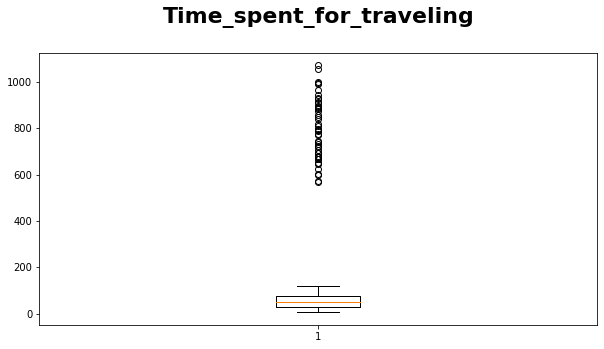

In [ ]:
import matplotlib.pyplot as plt #matplotlib เป็น library ที่ใช้แสดงกราฟได้ จริงๆมีให้ใช้อีกหลาย library

fig = plt.figure(figsize = (10,5)) #กำหนดขนาดโดยรวมของกราฟที่จะเอามาแสดง เหมือนเป็นกรอปรูปใหญ่ 

# add every single subplot to the figure with a for loop
k = 0
ax = fig.add_subplot(1, 1, 1) #สร้าง กราฟย่อย ในกรอบใหญ่ 
ax.set_title('Time_spent_for_traveling',fontweight="bold", fontsize=22,pad=30) #กำหนดข้อความหัวตาราง
ax.boxplot(df['Time_spent_for_traveling']) #สั่งให้ วาด boxplot ด้วยข้อมูลที่ระบุ

plt.show() #คำสั่งให้แสดงรูปกราฟ

Box plot to visualize outlier

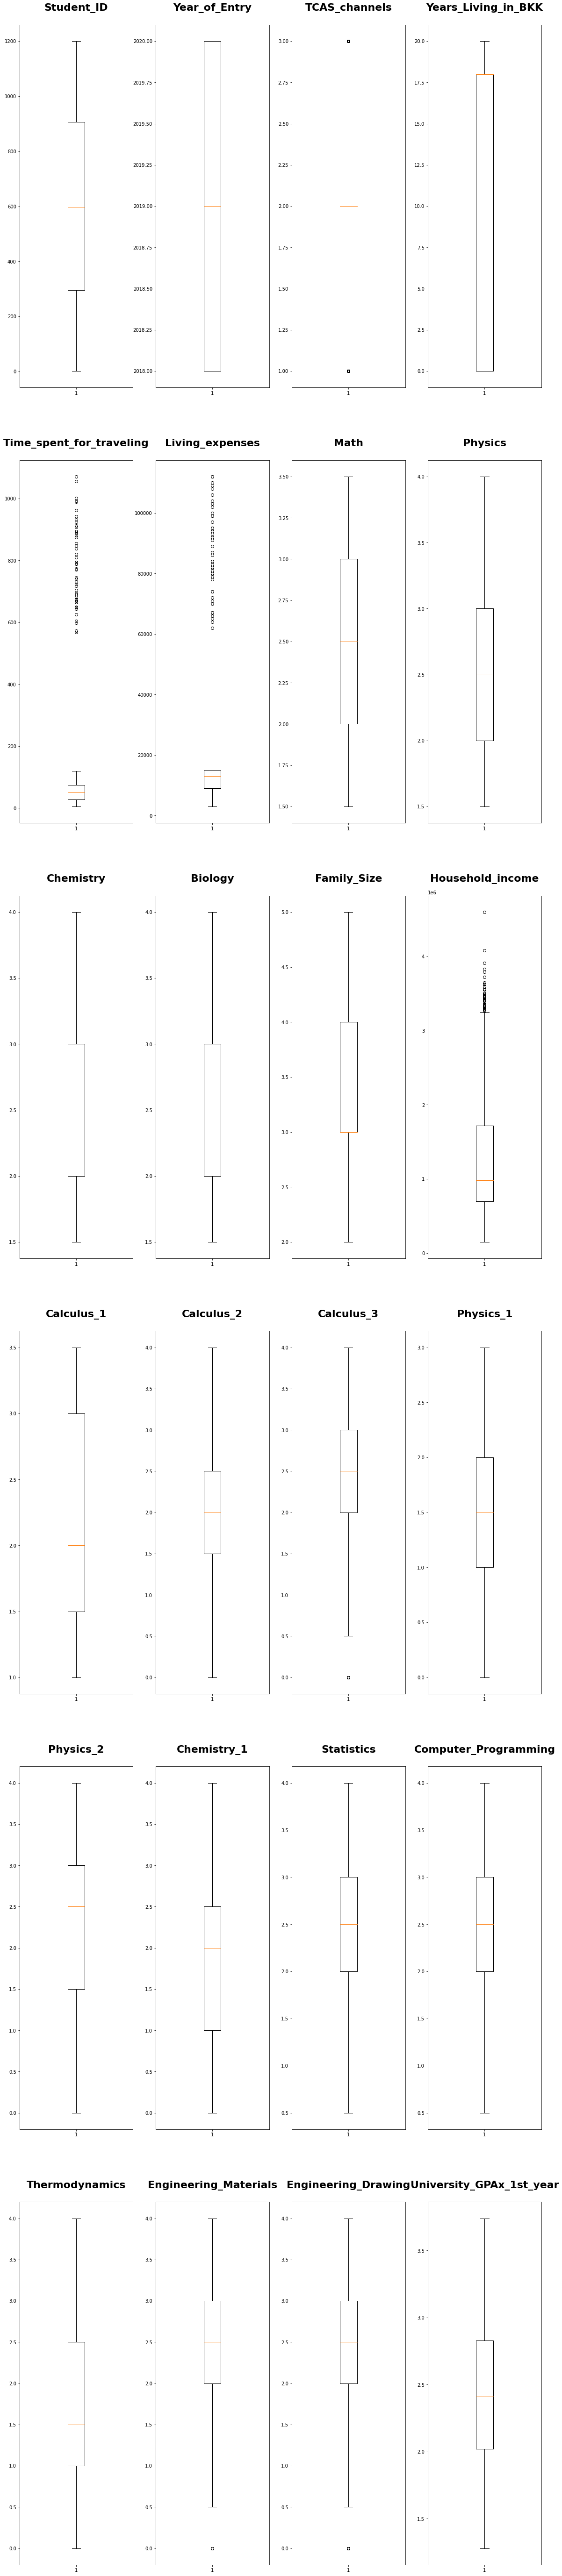

In [ ]:
import matplotlib.pyplot as plt

count = len(numeric_columns) #นับจำนวน feature ทั้งหมดที่จะเอามา plot กราฟ เลือกมาจากที่เป็นตัวเลขเท่านั้น

Tot = count
Cols = 4                     #กำหนดการแสดงกราฟ มีหลาย feature กำหนดให้มีจำนวน column เท่ากับ 4
# Compute Rows required

Rows = Tot // Cols          #คำนวณหาจำนวนแถว ในการแสดงผลกราฟ กราฟจะแสดง หลายกราฟพร้อมกัน จำนวนกราฟรวมเท่ากับ count จัดแสดงแบบ Matrix RowsxCols

#     EDIT for correct number of rows:
#     If one additional row is necessary -> add one:

if Tot % Cols != 0:
    Rows += 1

# Create a Position index

Position = range(1,Tot + 1)

fig = plt.figure(figsize = (20,100)) #กำหนดขนาดกรอบรวมของกราฟ

k=0
#ทำการ Plot กราฟทั้งหมดทีละกราฟ ตามตำแหน่งที่คำนวณไว้ตาม Rows และ Cols

for col in numeric_columns:

  # add every single subplot to the figure with a for loop
  ax = fig.add_subplot(Rows,Cols,Position[k])             #กำหนด ตำแหน่ง ที่เอามา Plot
  ax.set_title(col,fontweight="bold", fontsize=22,pad=30) #กำหนดชื่อกราฟย่อยตาม feature ที่เอามา Plot
  ax.boxplot(df[col])                                     #สั่งวาดกราฟ Box Plot ตามตำแหน่งที่กำหนด
  k+=1

plt.show()

### remove outlier

interquartile range filtering

**Box and whisker plot**

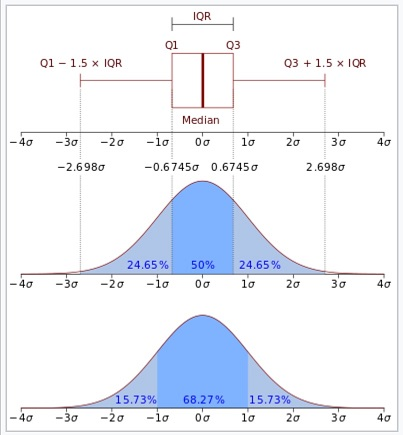

https://en.wikipedia.org/wiki/Box_plot

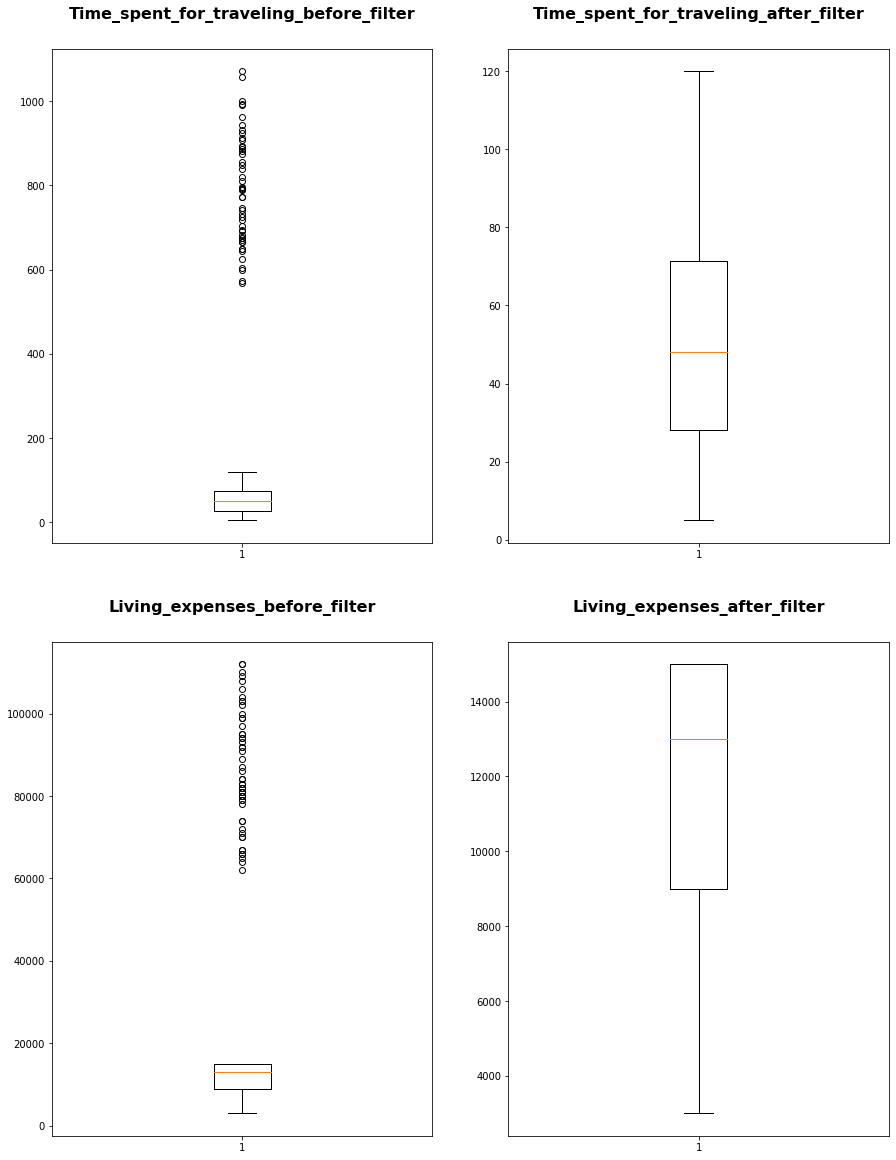

In [ ]:
#ใช้ข้อมูลทางสถิติของข้อมูลมาตัด Outlier ในทีนี้ใช้ Inter Quantile คำนวณจาก Q3-Q1
df3=df.copy()

Q1 = df3['Time_spent_for_traveling'].quantile(0.25) #คำนวณหาค่า Q1
Q3 = df3['Time_spent_for_traveling'].quantile(0.75) #คำนวณหาค่า Q3
IQR = Q3 - Q1    #IQR is interquartile range. 

#กรอง เอาเฉพาะข้อมูลที่อยู่ในช่วง (Q1-1.5*IQR) ถึง (Q3 +1.5*IQR) 

filter = (df3['Time_spent_for_traveling'] >= Q1 - 1.5 * IQR) & (df3['Time_spent_for_traveling'] <= Q3 + 1.5 *IQR)

df3_filtered = df3.loc[filter]  #ดึงข้อมูลที่จะใช้งานเอาเฉพาะที่กรองไว้

Q1 = df3['Living_expenses'].quantile(0.25) #คำนวณหาค่า Q1
Q3 = df3['Living_expenses'].quantile(0.75) #คำนวณหาค่า Q3
IQR = Q3 - Q1    #IQR is interquartile range. 

filter2 = (df3['Living_expenses'] >= Q1 - 1.5 * IQR) & (df3['Living_expenses'] <= Q3 + 1.5 *IQR)

df3_filtered = df3_filtered.loc[filter2]  #ดึงข้อมูลที่จะใช้งานเอาเฉพาะที่กรองไว้

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (15,20))
ax = fig.add_subplot(2,2,1)
ax.set_title('Time_spent_for_traveling_before_filter',fontweight="bold", fontsize=16,pad=30)
ax.boxplot(df['Time_spent_for_traveling'])

ax1 = fig.add_subplot(2,2,2)
ax1.set_title('Time_spent_for_traveling_after_filter',fontweight="bold", fontsize=16,pad=30)
ax1.boxplot(df3_filtered['Time_spent_for_traveling'])

ax2 = fig.add_subplot(2,2,3)
ax2.set_title('Living_expenses_before_filter',fontweight="bold", fontsize=16,pad=30)
ax2.boxplot(df['Living_expenses'])

ax3 = fig.add_subplot(2,2,4)
ax3.set_title('Living_expenses_after_filter',fontweight="bold", fontsize=16,pad=30)
ax3.boxplot(df3_filtered['Living_expenses'])

plt.show()

threshold filtering

In [ ]:
#ใช้การพิจารณาดูกราฟ แล้วตั้งเกณฑ์ในการจำกัด Outlier ไปโดยดูว่าช่วงไหนน่าจะเป็นความผิดพลาดแล้วกรองทิ้งไป
import numpy as np

df2=df.copy()

print('Before remove :',df2.shape)
threshold_Time_spent_for_traveling = np.where(df2['Time_spent_for_traveling'] >= 400) #กำหนดว่าหากระยะทางเกิน 400 น่าจะกรอกผิด กรองข้อมูลที่ต้องการลบเก็บไว้ที่ตัวแปร

# Removing the Outliers
df2.drop(threshold_Time_spent_for_traveling[0], inplace = True) #remove ข้อมูลที่กรองไว้ทิ้งไป
df2=df2.reset_index(drop=True)                                  #เรียงลำดับ index ใหม่เพื่อเวลาเอาไปใช้งานต่อจะสะดวกกว่า เวลาเอาไปทำ loop ต่างๆ

threshold_Living_expenses = np.where(df2['Living_expenses'] >= 60000)

df2.drop(threshold_Living_expenses[0], inplace = True) #remove ข้อมูลที่กรองไว้ทิ้งไป
df2=df2.reset_index(drop=True) #เรียงลำดับ index ใหม่เพื่อเวลาเอาไปใช้งานต่อจะสะดวกกว่า เวลาเอาไปทำ loop ต่างๆ

print('After remove :',df2.shape)

Before remove : (1045, 41)
After remove : (943, 41)


check again

Student_ID
Year_of_Entry
TCAS_channels
Years_Living_in_BKK
Time_spent_for_traveling
Living_expenses
Math
Physics
Chemistry
Biology
Family_Size
Household_income
Calculus_1
Calculus_2
Calculus_3
Physics_1
Physics_2
Chemistry_1
Statistics
Computer_Programming
Thermodynamics
Engineering_Materials
Engineering_Drawing
University_GPAx_1st_year


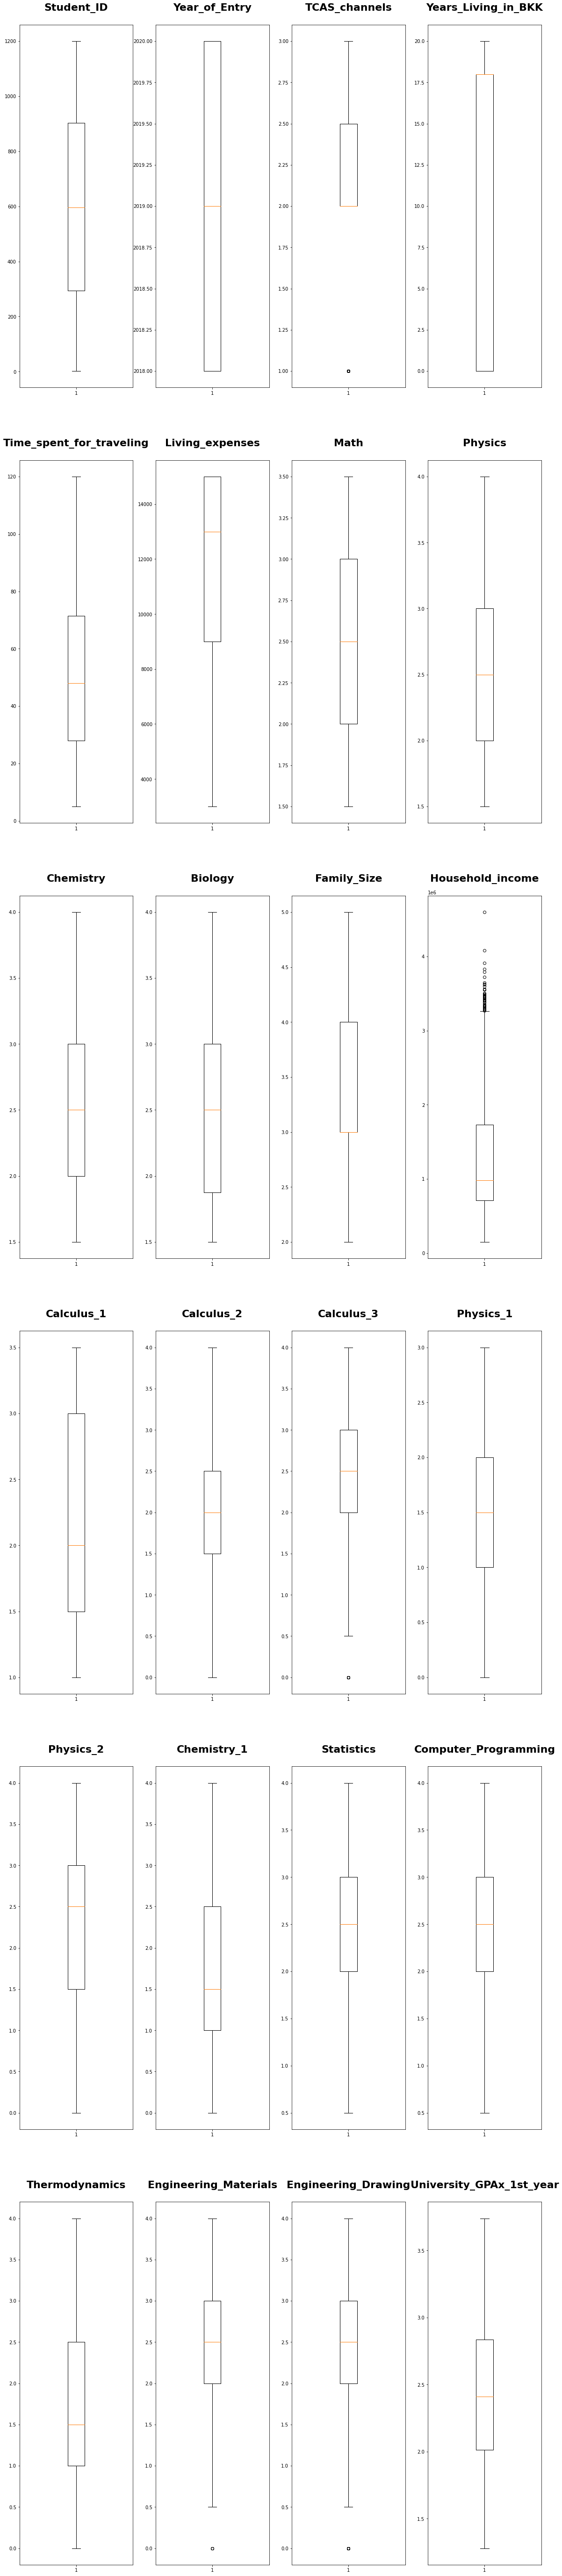

In [ ]:
import matplotlib.pyplot as plt

Tot = count
Cols = 4
# Compute Rows required

Rows = Tot // Cols 

#     EDIT for correct number of rows:
#     If one additional row is necessary -> add one:

if Tot % Cols != 0:
    Rows += 1

# Create a Position index

Position = range(1,Tot + 1)

fig = plt.figure(figsize = (20,100))

k=0
for col in numeric_columns:

  # add every single subplot to the figure with a for loop
  print(col)
  ax = fig.add_subplot(Rows,Cols,Position[k])
  ax.set_title(col,fontweight="bold", fontsize=22,pad=30)
  ax.boxplot(df2[col])
  k+=1

plt.show()

update data

In [ ]:
df=df2.copy() #copy ข้อมูลที่ต้องการใช้งาน กลับมาที่ df หลัก เพื่อเอาข้อมูลนี้ไปใช้งานต่อ
df

,Student_ID,Year_of_Entry,TCAS_channels,Years_Living_in_BKK,Hometown_REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,InternetAccess_at_Home,Living_expenses,...,Chemistry_1,Statistics,Computer_Programming,Thermodynamics,Engineering_Materials,Engineering_Drawing,University_GPAx_1st_year,Scholarship_Excellent_Performance,Scholarship_Financial_Aid,Participation_on_Activities
0,2,2020.0,3.0,18.0,BKK,Urban,Home,5,WIFI,11000,...,3.5,3.5,2.5,4.0,3.0,1.0,2.86,No,No,High
1,4,2020.0,1.0,3.0,BKK,Urban,Home,77,Wifi,12000,...,1.5,2.5,2.0,2.0,1.5,2.0,2.20,No,No,Low
2,7,2020.0,2.0,18.0,BKK,Urban,Apartment,16,Mobile,11000,...,1.5,3.0,3.0,2.0,3.5,1.0,2.83,No,No,Medium
3,8,2020.0,2.0,3.0,BKK,Urban,Apartment,79,Wifi,15000,...,0.5,3.0,2.5,1.5,2.5,2.5,2.52,No,No,No
4,9,2020.0,2.0,3.0,BKK,Urban,Home,68,Wifi,12000,...,1.5,2.0,2.0,0.5,1.0,2.0,1.90,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1195,2018.0,2.0,19.0,BKK,Urban,Apartment,60,Mobile,7000,...,1.5,3.0,2.5,2.0,3.0,2.0,2.50,No,No,Low
939,1196,2018.0,3.0,0.0,S,Urban,Apartment,17,WIFI,15000,...,4.0,3.5,3.0,2.0,4.0,2.5,3.23,No,No,Medium
940,1198,2018.0,2.0,0.0,S,Rural,Apartment,26,Wifi,12000,...,1.0,3.0,2.0,1.0,3.0,1.5,2.06,No,No,Medium
941,1199,2018.0,2.0,19.0,BKK,Urban,Apartment,50,Mobile,10000,...,2.0,2.5,1.5,1.5,1.0,2.5,1.93,No,No,Low


## Inconsistency

filter feature with text or object

In [ ]:
text_columns = df.dtypes[df.dtypes == "object"].index.values.tolist() #เลือก column หรือ feature ที่อาจจะมีปัญหา โดนปกติคือ พวกที่ไม่ใช่ตัวเลข จริงเอาพวก object มาพิจารณา
print('feature with object type of data:\n')
print(*text_columns, sep = "\n")

feature with object type of data:

Hometown_REGION
Address_Type
Where_to_stay
InternetAccess_at_Home
Type_of_prior_school
Prior_School_Province_REGION
School_name
Stay_with
Family_status
Father_Education
Mother_Education
guardian
mother_job
father_job
Scholarship_Excellent_Performance
Scholarship_Financial_Aid
Participation_on_Activities


check inconsistencies

In [ ]:
# get all the unique values in the column
df2 = df[text_columns].copy()
df2 = df2.astype('string') #เพื่อความแน่ใจในการจัดการต่อไป จริงแปลงข้อมูลที่กรองมาว่าไม่ใช่ column ที่เป็นตัวเลขล้าน แปลงให้เป็นข้อมูลชนิด ข้อความ

for col in df2:
  x = df2[col].unique() #ลองดูว่า ข้อมูลนี้มีค่าอะไรบ้าง โดยสรุป
  x=sorted(x) #เรียงค่าใน column ต่างๆ
  print(col, x)

Hometown_REGION ['BKK', 'E', 'N', 'NE', 'S']
Address_Type ['Rural', 'Urban']
Where_to_stay ['A partment', 'Apart ment', 'Apartment', 'Hme', 'Ho me', 'Home']
InternetAccess_at_Home ['Mobile', 'W1fi', 'WIFI', 'Wfi', 'Wifi', 'Wofi', 'wIFI']
Type_of_prior_school ['High School', 'High.School', 'Vocational School', 'Vocational.School']
Prior_School_Province_REGION ['BKK', 'E', 'N', 'NE', 'S']
School_name ['BKK1', 'BKK10', 'BKK2', 'BKK3', 'BKK4', 'BKK5', 'BKK6', 'BKK7', 'BKK8', 'BKK9', 'E1', 'E10', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'N2', 'N7', 'N8', 'NE1', 'NE10', 'NE2', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'NE8', 'NE9', 'S1', 'S10', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
Stay_with ['Alone', 'Mom or Dad', 'Parents', 'Relatives', 'Roommates']
Family_status ['Apart', 'Together']
Father_Education ['Bachelor', 'Doctoral', 'HighSchool', 'Master', 'Vocational']
Mother_Education ['Bachelor', 'Doctoral', 'HighSchool', 'Master', 'Primary', 'Vocational']
guardian ['Father', 'Mother

remove space

In [ ]:
#Where_to_stay have space problem
#Use replace to fix

#สังเกตุ Where_to_stay มีปัญหา มีช่องว่างในคำ ต้องแก้ไข

df2=df.copy()
print(df2['Where_to_stay'].unique()) #ดูให้ละเอียดอีกทีว่า ค่าใน feature มีอะไรบ้าง อะไรที่ต้องจัดการ

df2['Where_to_stay'] = df2['Where_to_stay'].str.replace(' ', '') #ใช้คำสั่ง .str.replace เพื่อลบช่องว่างในคำ
# Verify changes have been effected
print(df2['Where_to_stay'].unique()) #ตรวจสอบหลังปรับปรุงว่า เรียบร้อยหรือไม่

df=df2.copy() #อัพเดตข้อมูล df ตามที่ปรับปรุงไป


['Home' 'Apartment' 'Hme' 'Apart ment' 'Ho me' 'A partment']
['Home' 'Apartment' 'Hme']


Fix case sensitive

In [ ]:
#InternetAccess_at_Home have letter inconsitency problem
#Use lower case to fix

#สังเกตุ InternetAccess_at_Home มีปัญหาหลายอย่าง ที่เห็นอย่างแรกคือ คำมีการใช้ตัวเล็กตัวใหญ่ปนกัน ทั้งๆที่อ่านได้ความหมายเดียวกัน ต้องแก้ไข

df2=df.copy()
print(df2['InternetAccess_at_Home'].unique())

df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.lower() #ใช้คำสั่ง .str.lower() ทำให้ทุกคำเป็นตัวเล็กทั้งหมด
# Verify changes have been effected
print(df2['InternetAccess_at_Home'].unique())

df=df2.copy()


['WIFI' 'Wifi' 'Mobile' 'W1fi' 'Wfi' 'Wofi' 'wIFI']
['wifi' 'mobile' 'w1fi' 'wfi' 'wofi']


remove miss spelling

In [ ]:
#InternetAccess_at_Home have miss spelling problem
#Use replace to fix

#สังเกตุ InternetAccess_at_Home มีปัญหาหลายอย่าง อีกอย่างคือ สะกดผิด ต้องแก้ไข

df2=df.copy()
print(df2['InternetAccess_at_Home'].unique())

df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.replace('w1fi', 'wifi') #ใช้คำสั่ง .str.replace เพื่อแทนที่คำที่ผิด ด้วยคำที่ถูก
# Verify changes have been effected
print(df2['InternetAccess_at_Home'].unique())

df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.replace('wofi', 'wifi') #ใช้คำสั่ง .str.replace เพื่อแทนที่คำที่ผิด ด้วยคำที่ถูก
print(df2['InternetAccess_at_Home'].unique())

df2['InternetAccess_at_Home'] = df2['InternetAccess_at_Home'].str.replace('wfi', 'wifi') #ใช้คำสั่ง .str.replace เพื่อแทนที่คำที่ผิด ด้วยคำที่ถูก
print(df2['InternetAccess_at_Home'].unique())

#Where_to_stay have miss spelling problem
#Use replace to fix

#สังเกตุ Where_to_stay มีปัญหาสะกดผิดเช่นกัน ต้องแก้ไข

print(df2['Where_to_stay'].unique())

df2['Where_to_stay'] = df2['Where_to_stay'].str.replace('Hme', 'Home') #ใช้คำสั่ง .str.replace เพื่อแทนที่คำที่ผิด ด้วยคำที่ถูก
# Verify changes have been effected
print(df2['Where_to_stay'].unique())

df=df2.copy()

['wifi' 'mobile' 'w1fi' 'wfi' 'wofi']
['wifi' 'mobile' 'wfi' 'wofi']
['wifi' 'mobile' 'wfi']
['wifi' 'mobile']
['Home' 'Apartment' 'Hme']
['Home' 'Apartment']


remove dot

In [ ]:
#Type_of_prior_school have dot problem
#Use replace to fix

#สังเกตุ Type_of_prior_school มีปัญหา มีตัวจุด . แทรกในคำ ต้องแก้ไข

df2=df.copy()
print(df2['Type_of_prior_school'].unique())

df2['Type_of_prior_school'] = df2['Type_of_prior_school'].str.replace('.', ' ') #ใช้คำสั่ง .str.replace เพื่อลบจุด . ออกไป ด้วยคำที่ถูก
# Verify changes have been effected
print(df2['Type_of_prior_school'].unique())

df=df2.copy()

['High School' 'Vocational School' 'Vocational.School' 'High.School']
['High School' 'Vocational School']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


check inconsistencies

In [ ]:
# get all the unique values in the column
df2 = df[text_columns].copy()
df2 = df2.astype('string')

for col in df2:
  x = df2[col].unique()
  x=sorted(x)
  print(col, x)

Hometown_REGION ['BKK', 'E', 'N', 'NE', 'S']
Address_Type ['Rural', 'Urban']
Where_to_stay ['Apartment', 'Home']
InternetAccess_at_Home ['mobile', 'wifi']
Type_of_prior_school ['High School', 'Vocational School']
Prior_School_Province_REGION ['BKK', 'E', 'N', 'NE', 'S']
School_name ['BKK1', 'BKK10', 'BKK2', 'BKK3', 'BKK4', 'BKK5', 'BKK6', 'BKK7', 'BKK8', 'BKK9', 'E1', 'E10', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'N2', 'N7', 'N8', 'NE1', 'NE10', 'NE2', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'NE8', 'NE9', 'S1', 'S10', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
Stay_with ['Alone', 'Mom or Dad', 'Parents', 'Relatives', 'Roommates']
Family_status ['Apart', 'Together']
Father_Education ['Bachelor', 'Doctoral', 'HighSchool', 'Master', 'Vocational']
Mother_Education ['Bachelor', 'Doctoral', 'HighSchool', 'Master', 'Primary', 'Vocational']
guardian ['Father', 'Mother']
mother_job ['Business', 'Freelance', 'Private', 'Public']
father_job ['Business', 'Freelance', 'Private', 'Public']


## Normalization of data

กรองเอาเฉพาะ column ที่เป็นตัวเลขมาทำต่อ

In [ ]:

import numpy as np
numeric_columns = list(df.select_dtypes([np.number]).columns) #กรองเฉพาะ feature ที่เป็นตัวเลขมาพิจารณา
print('feature with number type of data:\n')
print(*numeric_columns, sep = "\n")

feature with number type of data:

Student_ID
Year_of_Entry
TCAS_channels
Years_Living_in_BKK
Time_spent_for_traveling
Living_expenses
Math
Physics
Chemistry
Biology
Family_Size
Household_income
Calculus_1
Calculus_2
Calculus_3
Physics_1
Physics_2
Chemistry_1
Statistics
Computer_Programming
Thermodynamics
Engineering_Materials
Engineering_Drawing
University_GPAx_1st_year


max-min 0..1 normalization
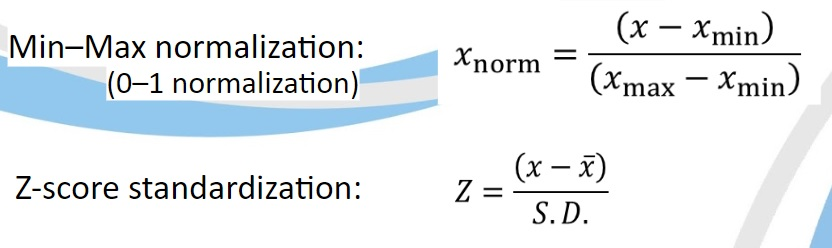

In [ ]:
df_NM = df.copy()

#ใช้ max-min normalization ตามสูตร เอาข้อมูลลบค่าน้อย หารด้วย ค่ามาก - ค่าน้อย
df_NM = (df_NM[numeric_columns] - df_NM[numeric_columns].min(axis=0)) / (df_NM[numeric_columns].max(axis=0) - df_NM[numeric_columns].min(axis=0))

df_NM

,Student_ID,Year_of_Entry,TCAS_channels,Years_Living_in_BKK,Time_spent_for_traveling,Living_expenses,Math,Physics,Chemistry,Biology,...,Calculus_3,Physics_1,Physics_2,Chemistry_1,Statistics,Computer_Programming,Thermodynamics,Engineering_Materials,Engineering_Drawing,University_GPAx_1st_year
0,0.000000,1.0,1.0,0.90,0.000000,0.666667,0.750,0.6,0.8,0.5,...,0.750,0.500000,0.375,0.875,0.857143,0.571429,1.000,0.750,0.250,0.642276
1,0.001669,1.0,0.0,0.15,0.626087,0.750000,0.375,0.2,0.4,0.5,...,0.500,0.500000,0.500,0.375,0.571429,0.428571,0.500,0.375,0.500,0.373984
2,0.004174,1.0,0.5,0.90,0.095652,0.666667,0.875,0.6,0.8,0.3,...,0.750,0.666667,0.500,0.375,0.714286,0.714286,0.500,0.875,0.250,0.630081
3,0.005008,1.0,0.5,0.15,0.643478,1.000000,0.625,0.7,0.4,0.4,...,0.750,0.666667,0.875,0.125,0.714286,0.571429,0.375,0.625,0.625,0.504065
4,0.005843,1.0,0.5,0.15,0.547826,0.750000,0.000,0.1,0.1,0.1,...,0.500,0.333333,0.500,0.375,0.428571,0.428571,0.125,0.250,0.500,0.252033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,0.995826,0.0,0.5,0.95,0.478261,0.333333,0.625,0.7,0.2,0.5,...,0.750,0.500000,0.750,0.375,0.714286,0.571429,0.500,0.750,0.500,0.495935
939,0.996661,0.0,1.0,0.00,0.104348,1.000000,1.000,0.6,0.0,0.9,...,0.625,0.666667,1.000,1.000,0.857143,0.714286,0.500,1.000,0.625,0.792683
940,0.998331,0.0,0.5,0.00,0.182609,0.750000,0.250,0.2,0.4,0.2,...,0.500,0.333333,0.625,0.250,0.714286,0.428571,0.250,0.750,0.375,0.317073
941,0.999165,0.0,0.5,0.95,0.391304,0.583333,0.375,0.1,0.1,0.1,...,0.250,0.333333,0.375,0.500,0.571429,0.285714,0.375,0.250,0.625,0.264228


Z-Score normalization
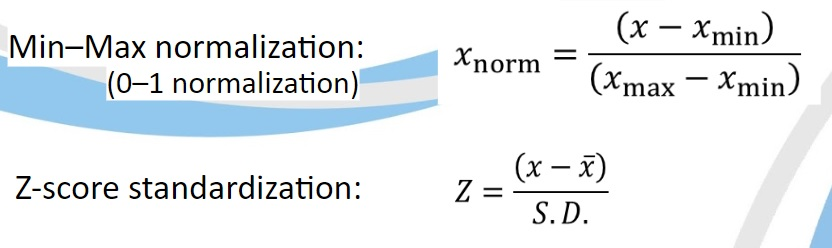

In [ ]:
df_NZ=df.copy()

#ใช้ Z-score normalization แปลงข้อมูลเป็นค่า Z ค่าข้อมูล - ค่าเฉลี่ย หารด้วย Standard Deviation
df_NZ[numeric_columns] = (df_NZ[numeric_columns] - df_NZ[numeric_columns].mean(axis=0)) / df_NZ[numeric_columns].std(axis=0)

df_NZ

,Student_ID,Year_of_Entry,TCAS_channels,Years_Living_in_BKK,Hometown_REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,InternetAccess_at_Home,Living_expenses,...,Chemistry_1,Statistics,Computer_Programming,Thermodynamics,Engineering_Materials,Engineering_Drawing,University_GPAx_1st_year,Scholarship_Excellent_Performance,Scholarship_Financial_Aid,Participation_on_Activities
0,-1.718017,1.252189,1.470963,0.957542,BKK,Urban,Home,-1.693046,wifi,-0.227828,...,1.736438,1.401979,0.204408,2.615525,0.735293,-1.507340,0.888762,No,No,High
1,-1.712270,1.252189,-1.945585,-0.804450,BKK,Urban,Home,1.050547,wifi,0.078215,...,-0.278279,0.088451,-0.431753,0.364096,-1.121979,-0.450128,-0.439994,No,No,Low
2,-1.703649,1.252189,-0.237311,0.957542,BKK,Urban,Apartment,-1.273886,mobile,-0.227828,...,-0.278279,0.745215,0.840570,0.364096,1.354384,-1.507340,0.828364,No,No,Medium
3,-1.700776,1.252189,-0.237311,-0.804450,BKK,Urban,Apartment,1.126757,wifi,0.996344,...,-1.285637,0.745215,0.204408,-0.198761,0.116203,0.078478,0.204252,No,No,No
4,-1.697902,1.252189,-0.237311,-0.804450,BKK,Urban,Home,0.707597,wifi,0.078215,...,-0.278279,-0.568313,-0.431753,-1.324475,-1.741069,-0.450128,-1.043974,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1.710164,-1.223313,-0.237311,1.075008,BKK,Urban,Apartment,0.402754,mobile,-1.452000,...,-0.278279,0.745215,0.204408,0.364096,0.735293,-0.450128,0.163986,No,No,Low
939,1.713038,-1.223313,1.470963,-1.156848,S,Urban,Apartment,-1.235780,wifi,0.996344,...,2.240118,1.401979,0.840570,0.364096,1.973474,0.078478,1.633671,No,No,Medium
940,1.718785,-1.223313,-0.237311,-1.156848,S,Rural,Apartment,-0.892831,wifi,0.078215,...,-0.781958,0.745215,-0.431753,-0.761618,0.735293,-0.978734,-0.721851,No,No,Medium
941,1.721659,-1.223313,-0.237311,1.075008,BKK,Urban,Apartment,0.021699,mobile,-0.533871,...,0.225400,0.088451,-1.067915,-0.198761,-1.741069,0.078478,-0.983576,No,No,Low


Update data with normalized data

In [ ]:
df2=df.copy()
df=df_NZ.copy()
df

,Student_ID,Year_of_Entry,TCAS_channels,Years_Living_in_BKK,Hometown_REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,InternetAccess_at_Home,Living_expenses,...,Chemistry_1,Statistics,Computer_Programming,Thermodynamics,Engineering_Materials,Engineering_Drawing,University_GPAx_1st_year,Scholarship_Excellent_Performance,Scholarship_Financial_Aid,Participation_on_Activities
0,-1.718017,1.252189,1.470963,0.957542,BKK,Urban,Home,-1.693046,wifi,-0.227828,...,1.736438,1.401979,0.204408,2.615525,0.735293,-1.507340,0.888762,No,No,High
1,-1.712270,1.252189,-1.945585,-0.804450,BKK,Urban,Home,1.050547,wifi,0.078215,...,-0.278279,0.088451,-0.431753,0.364096,-1.121979,-0.450128,-0.439994,No,No,Low
2,-1.703649,1.252189,-0.237311,0.957542,BKK,Urban,Apartment,-1.273886,mobile,-0.227828,...,-0.278279,0.745215,0.840570,0.364096,1.354384,-1.507340,0.828364,No,No,Medium
3,-1.700776,1.252189,-0.237311,-0.804450,BKK,Urban,Apartment,1.126757,wifi,0.996344,...,-1.285637,0.745215,0.204408,-0.198761,0.116203,0.078478,0.204252,No,No,No
4,-1.697902,1.252189,-0.237311,-0.804450,BKK,Urban,Home,0.707597,wifi,0.078215,...,-0.278279,-0.568313,-0.431753,-1.324475,-1.741069,-0.450128,-1.043974,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1.710164,-1.223313,-0.237311,1.075008,BKK,Urban,Apartment,0.402754,mobile,-1.452000,...,-0.278279,0.745215,0.204408,0.364096,0.735293,-0.450128,0.163986,No,No,Low
939,1.713038,-1.223313,1.470963,-1.156848,S,Urban,Apartment,-1.235780,wifi,0.996344,...,2.240118,1.401979,0.840570,0.364096,1.973474,0.078478,1.633671,No,No,Medium
940,1.718785,-1.223313,-0.237311,-1.156848,S,Rural,Apartment,-0.892831,wifi,0.078215,...,-0.781958,0.745215,-0.431753,-0.761618,0.735293,-0.978734,-0.721851,No,No,Medium
941,1.721659,-1.223313,-0.237311,1.075008,BKK,Urban,Apartment,0.021699,mobile,-0.533871,...,0.225400,0.088451,-1.067915,-0.198761,-1.741069,0.078478,-0.983576,No,No,Low


Return to data before normalization

In [ ]:
df=df2.copy()
df

,Student_ID,Year_of_Entry,TCAS_channels,Years_Living_in_BKK,Hometown_REGION,Address_Type,Where_to_stay,Time_spent_for_traveling,InternetAccess_at_Home,Living_expenses,...,Chemistry_1,Statistics,Computer_Programming,Thermodynamics,Engineering_Materials,Engineering_Drawing,University_GPAx_1st_year,Scholarship_Excellent_Performance,Scholarship_Financial_Aid,Participation_on_Activities
0,2,2020.0,3.0,18.0,BKK,Urban,Home,5,wifi,11000,...,3.5,3.5,2.5,4.0,3.0,1.0,2.86,No,No,High
1,4,2020.0,1.0,3.0,BKK,Urban,Home,77,wifi,12000,...,1.5,2.5,2.0,2.0,1.5,2.0,2.20,No,No,Low
2,7,2020.0,2.0,18.0,BKK,Urban,Apartment,16,mobile,11000,...,1.5,3.0,3.0,2.0,3.5,1.0,2.83,No,No,Medium
3,8,2020.0,2.0,3.0,BKK,Urban,Apartment,79,wifi,15000,...,0.5,3.0,2.5,1.5,2.5,2.5,2.52,No,No,No
4,9,2020.0,2.0,3.0,BKK,Urban,Home,68,wifi,12000,...,1.5,2.0,2.0,0.5,1.0,2.0,1.90,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,1195,2018.0,2.0,19.0,BKK,Urban,Apartment,60,mobile,7000,...,1.5,3.0,2.5,2.0,3.0,2.0,2.50,No,No,Low
939,1196,2018.0,3.0,0.0,S,Urban,Apartment,17,wifi,15000,...,4.0,3.5,3.0,2.0,4.0,2.5,3.23,No,No,Medium
940,1198,2018.0,2.0,0.0,S,Rural,Apartment,26,wifi,12000,...,1.0,3.0,2.0,1.0,3.0,1.5,2.06,No,No,Medium
941,1199,2018.0,2.0,19.0,BKK,Urban,Apartment,50,mobile,10000,...,2.0,2.5,1.5,1.5,1.0,2.5,1.93,No,No,Low


## Export Cleaned data to csv

Recheck data


missing data
feature name        missing data
number of duplication of data : 0



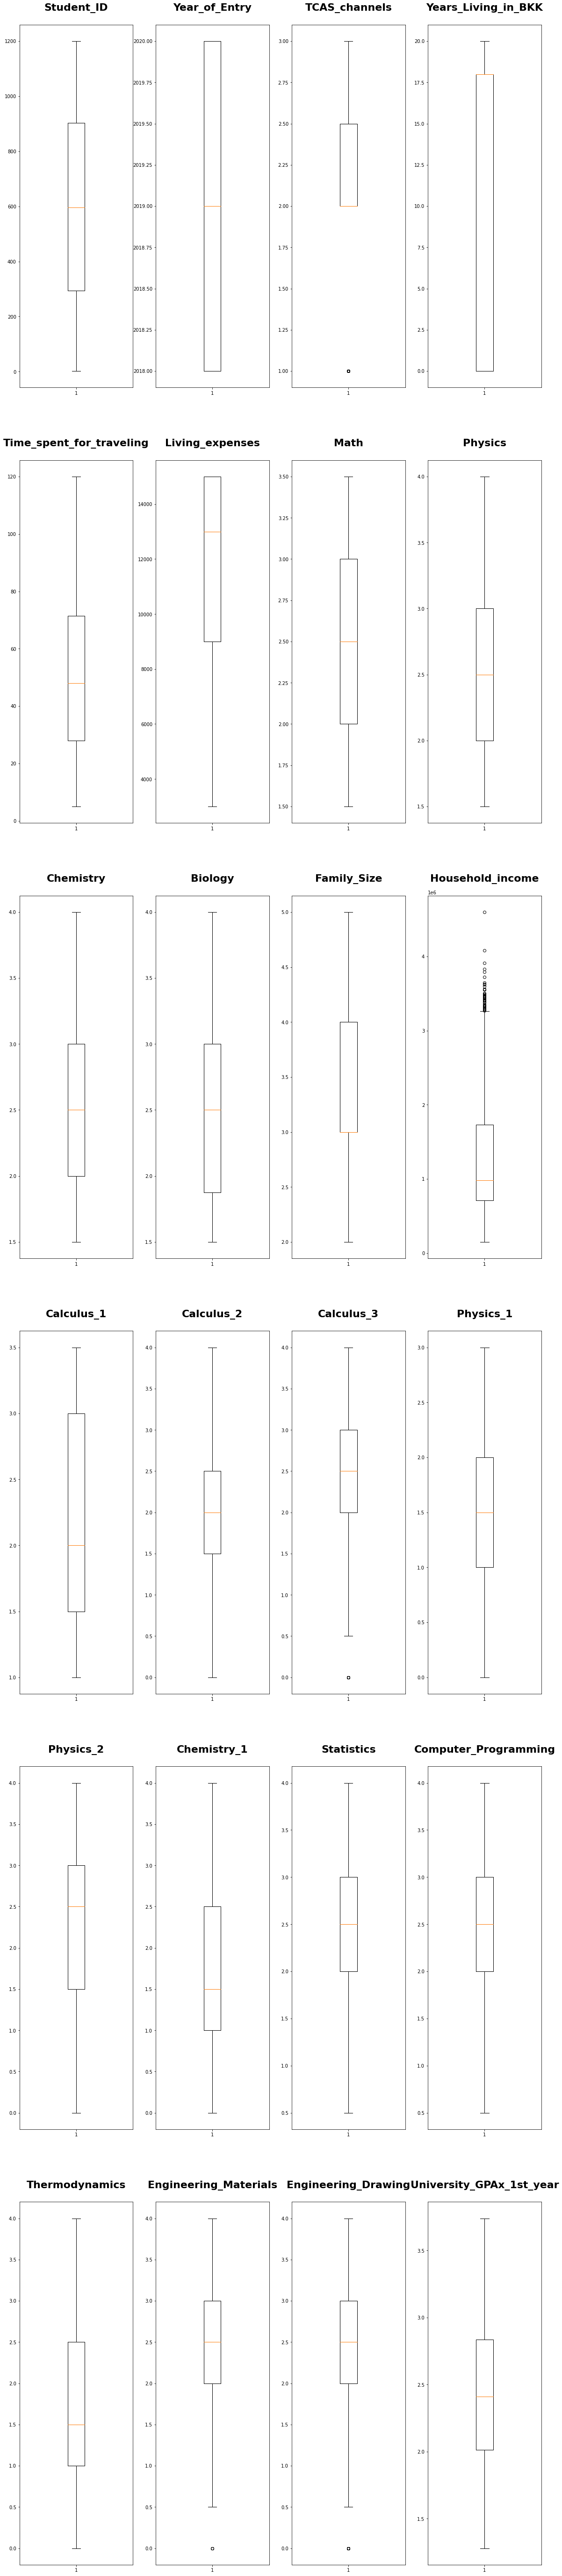

Hometown_REGION ['BKK', 'E', 'N', 'NE', 'S']
Address_Type ['Rural', 'Urban']
Where_to_stay ['Apartment', 'Home']
InternetAccess_at_Home ['mobile', 'wifi']
Type_of_prior_school ['High School', 'Vocational School']
Prior_School_Province_REGION ['BKK', 'E', 'N', 'NE', 'S']
School_name ['BKK1', 'BKK10', 'BKK2', 'BKK3', 'BKK4', 'BKK5', 'BKK6', 'BKK7', 'BKK8', 'BKK9', 'E1', 'E10', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'N2', 'N7', 'N8', 'NE1', 'NE10', 'NE2', 'NE3', 'NE4', 'NE5', 'NE6', 'NE7', 'NE8', 'NE9', 'S1', 'S10', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9']
Stay_with ['Alone', 'Mom or Dad', 'Parents', 'Relatives', 'Roommates']
Family_status ['Apart', 'Together']
Father_Education ['Bachelor', 'Doctoral', 'HighSchool', 'Master', 'Vocational']
Mother_Education ['Bachelor', 'Doctoral', 'HighSchool', 'Master', 'Primary', 'Vocational']
guardian ['Father', 'Mother']
mother_job ['Business', 'Freelance', 'Private', 'Public']
father_job ['Business', 'Freelance', 'Private', 'Public']


In [ ]:
#missing data
print('\nmissing data')
print(f"{'feature name':<20}{'missing data':>10}") 
for col in df.columns: #วนลูป ให้ครบทุก column
  if df[col].isnull().sum() > 0: #ตรวจสอบว่า column นี้มีข้อมูลที่หายไปไหม
    print(f"{col:<20}{df[col].isnull().sum():>10}") #แสดงผล column (จะแสดงเฉพาะที่มีข้อมูลหายเท่านั้น ข้อมูลครบไม่แสดง) ส่วน :<20 และ :>10 ไว้จัด column
    #ศึกษาการจัดรูปแบบเพิ่มเติมได้ที่ https://phyblas.hinaboshi.com/20190714
    
#duplication
print(f'number of duplication of data : {df.duplicated().sum()}\n')

#outliers
numeric_columns = list(df.select_dtypes([np.number]).columns)

import matplotlib.pyplot as plt

count =  len(numeric_columns)

Tot = count
Cols = 4
# Compute Rows required

Rows = Tot // Cols 

#     EDIT for correct number of rows:
#     If one additional row is necessary -> add one:

if Tot % Cols != 0:
    Rows += 1

# Create a Position index

Position = range(1,Tot + 1)

fig = plt.figure(figsize = (20,100))

k=0
for col in numeric_columns:

  # add every single subplot to the figure with a for loop
  ax = fig.add_subplot(Rows,Cols,Position[k])
  ax.set_title(col,fontweight="bold", fontsize=22,pad=30)
  ax.boxplot(df[col])
  k+=1

plt.show()

#inconsistency
text_columns = df.dtypes[df.dtypes == "object"].index.values.tolist()
# get all the unique values in the column
df2 = df[text_columns].copy()
df2 = df2.astype('string')

for col in df2:
  x = df2[col].unique()
  x=sorted(x)
  print(col, x)

In [ ]:
from google.colab import files
df.to_csv('output.csv', index=False)    #คำสั่ง .to_csv เป็นการ save ข้อมูล df ให้เป็น file csv 
files.download('output.csv')  #files.download จะทำการ download ไฟล์ csv ลงเครื่อง

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>